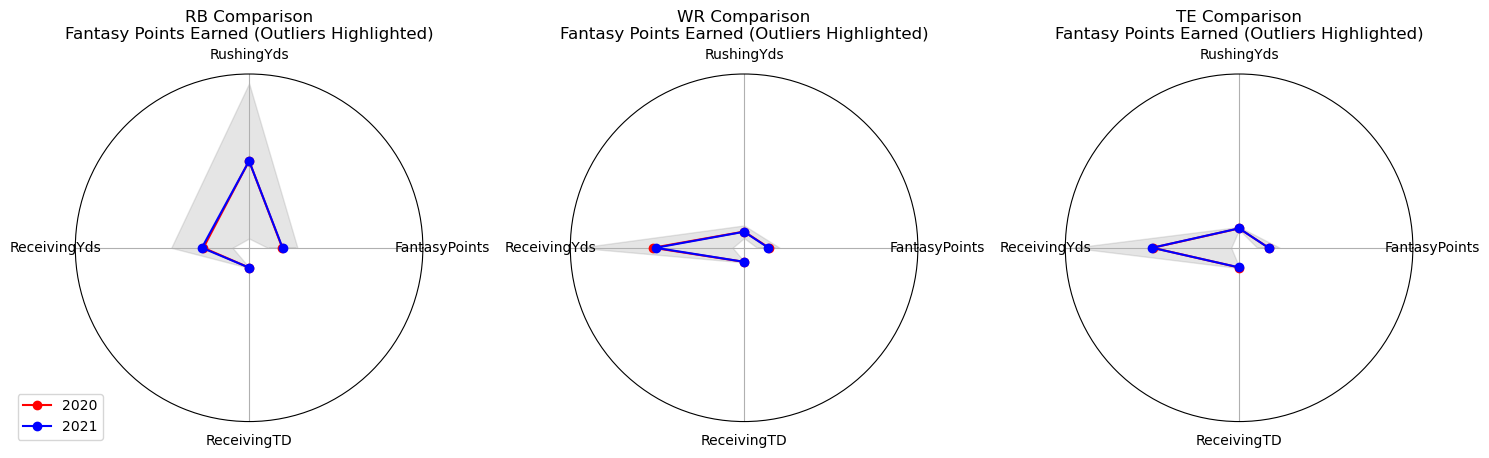

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the CSV files
df_ff_data_2020 = pd.read_csv("Data/CSV DATA/2020.csv")
df_ff_data_2021 = pd.read_csv("Data/CSV DATA/2021.csv")

# Filter the data by position
rb_data_2020 = df_ff_data_2020[df_ff_data_2020['Pos'] == 'RB']
wr_data_2020 = df_ff_data_2020[df_ff_data_2020['Pos'] == 'WR']
te_data_2020 = df_ff_data_2020[df_ff_data_2020['Pos'] == 'TE']

rb_data_2021 = df_ff_data_2021[df_ff_data_2021['Pos'] == 'RB']
wr_data_2021 = df_ff_data_2021[df_ff_data_2021['Pos'] == 'WR']
te_data_2021 = df_ff_data_2021[df_ff_data_2021['Pos'] == 'TE']

# Define the statistics for each position
stats = ['FantasyPoints', 'RushingYds', 'ReceivingYds', 'ReceivingTD']  # Adjusted statistics

# Calculate the mean values for each statistic for the top 15 players in each position
rb_means_2020 = np.array([rb_data_2020[stat].mean() for stat in stats])
wr_means_2020 = np.array([wr_data_2020[stat].mean() for stat in stats])
te_means_2020 = np.array([te_data_2020[stat].mean() for stat in stats])

rb_means_2021 = np.array([rb_data_2021[stat].mean() for stat in stats])
wr_means_2021 = np.array([wr_data_2021[stat].mean() for stat in stats])
te_means_2021 = np.array([te_data_2021[stat].mean() for stat in stats])

# Calculate the standard deviations for each statistic for the top 15 players in each position
rb_stds_2020 = np.array([rb_data_2020[stat].std() for stat in stats])
wr_stds_2020 = np.array([wr_data_2020[stat].std() for stat in stats])
te_stds_2020 = np.array([te_data_2020[stat].std() for stat in stats])

rb_stds_2021 = np.array([rb_data_2021[stat].std() for stat in stats])
wr_stds_2021 = np.array([wr_data_2021[stat].std() for stat in stats])
te_stds_2021 = np.array([te_data_2021[stat].std() for stat in stats])

# Number of statistics
num_stats = len(stats)

# Create a function to close the radar plot
def close_radar_chart(ax, position_label, means_2020, stds_2020, means_2021, stds_2021):
    ax.fill_between(np.linspace(0, 2 * np.pi, num_stats, endpoint=False), means_2020 - stds_2020, means_2020 + stds_2020, color='white', alpha=0.2)
    ax.fill_between(np.linspace(0, 2 * np.pi, num_stats, endpoint=False), means_2021 - stds_2021, means_2021 + stds_2021, color='gray', alpha=0.2)
    ax.set_xticks(np.linspace(0, 2 * np.pi, num_stats, endpoint=False))
    ax.set_xticklabels(stats)
    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.set_title(f'{position_label} Comparison\nFantasy Points Earned (Outliers Highlighted)')

# Create subplots for each position
fig, axes = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'polar': True})

# Plot RB radar chart for both years
close_radar_chart(axes[0], 'RB', rb_means_2020, rb_stds_2020, rb_means_2021, rb_stds_2021)
axes[0].plot(np.linspace(0, 2 * np.pi, num_stats, endpoint=False), rb_means_2020, 'o-', label='2020', color='red')
axes[0].plot(np.linspace(0, 2 * np.pi, num_stats, endpoint=False), rb_means_2021, 'o-', label='2021', color='blue')

# Plot WR radar chart for both years
close_radar_chart(axes[1], 'WR', wr_means_2020, wr_stds_2020, wr_means_2021, wr_stds_2021)
axes[1].plot(np.linspace(0, 2 * np.pi, num_stats, endpoint=False), wr_means_2020, 'o-', label='2020', color='red')
axes[1].plot(np.linspace(0, 2 * np.pi, num_stats, endpoint=False), wr_means_2021, 'o-', label='2021', color='blue')

# Plot TE radar chart for both years
close_radar_chart(axes[2], 'TE', te_means_2020, te_stds_2020, te_means_2021, te_stds_2021)
axes[2].plot(np.linspace(0, 2 * np.pi, num_stats, endpoint=False), te_means_2020, 'o-', label='2020', color='red')
axes[2].plot(np.linspace(0, 2 * np.pi, num_stats, endpoint=False), te_means_2021, 'o-', label='2021', color='blue')

# Add legend
axes[0].legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the radar chart
plt.tight_layout()
plt.show()


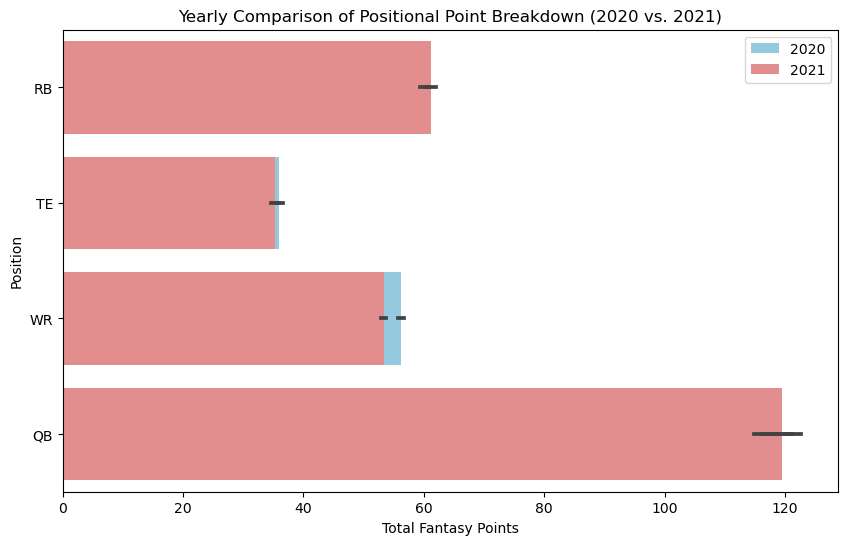

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV files
df_ff_data_2020 = pd.read_csv("Data/CSV DATA/2020.csv")
df_ff_data_2021 = pd.read_csv("Data/CSV DATA/2021.csv")

# Specify the columns you want to use for comparison
columns_to_compare = ['Pos', 'FantasyPoints']

# Extract and rename the columns for 2020
df_ff_data_2020 = df_ff_data_2020[columns_to_compare]
df_ff_data_2020.rename(columns={'FantasyPoints': 'FantasyPoints_2020'}, inplace=True)

# Extract and rename the columns for 2021
df_ff_data_2021 = df_ff_data_2021[columns_to_compare]
df_ff_data_2021.rename(columns={'FantasyPoints': 'FantasyPoints_2021'}, inplace=True)

# Merge the data for both years
merged_data = pd.merge(df_ff_data_2020, df_ff_data_2021, on='Pos')

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a horizontal bar plot using Seaborn
sns.barplot(x='FantasyPoints_2020', y='Pos', data=merged_data, color='skyblue', label='2020', orient='h')
sns.barplot(x='FantasyPoints_2021', y='Pos', data=merged_data, color='lightcoral', label='2021', orient='h')

# Add labels and title
plt.xlabel('Total Fantasy Points')
plt.ylabel('Position')
plt.title('Yearly Comparison of Positional Point Breakdown (2020 vs. 2021)')

# Add a legend
plt.legend()

# Show the plot
plt.show()



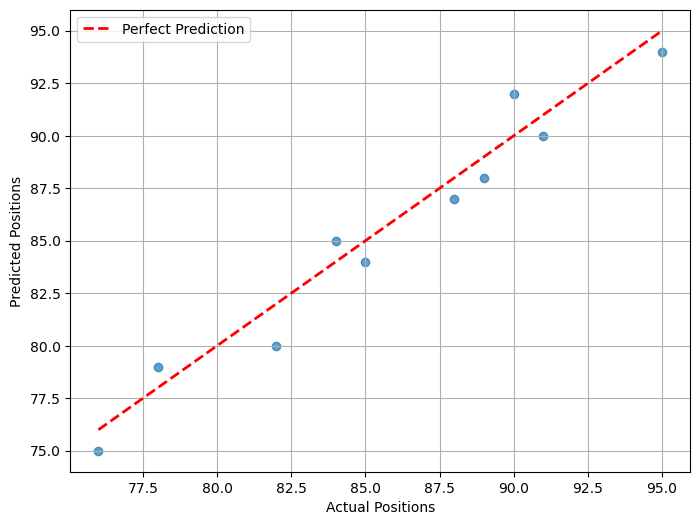

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace this with your actual data)
actual_positions = [82, 88, 90, 76, 95, 78, 85, 91, 89, 84]
predicted_positions = [80, 87, 92, 75, 94, 79, 84, 90, 88, 85]

# Create a DataFrame with the sample data
data = pd.DataFrame({'Actual Positions': actual_positions, 'Predicted Positions': predicted_positions})

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['Actual Positions'], data['Predicted Positions'], alpha=0.7)
plt.xlabel('Actual Positions')
plt.ylabel('Predicted Positions')

# Add a diagonal line for reference (perfect prediction)
plt.plot([min(data['Actual Positions']), max(data['Actual Positions'])],
         [min(data['Actual Positions']), max(data['Actual Positions'])],
         linestyle='--', color='red', linewidth=2, label='Perfect Prediction')

plt.legend()
plt.grid(True)
plt.show()


In [6]:
# Import NFL weekly data for the specified years
import nfl_data_py as nfl
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Set the range of years to sample data for
years = list(np.arange(2013, 2023))

# Import data from the nfl_data_py library
weekly = nfl.import_weekly_data(years)
print(f"There are {len(weekly)} records in the years {years}")


Downcasting floats.
There are 53808 records in the years [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
